<a href="https://colab.research.google.com/github/bettytan123/medical-data/blob/main/model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Required Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


https://www.kaggle.com/code/shubhamsutar27/patient-condition-classification
in copperate the data from kaggle test.csv

In [4]:
data = pd.read_csv('/content/drugsComTrain_raw.csv')
data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [6]:
column_name = 'condition'  # Replace 'column_name' with the actual column name from your dataset

# Create the frequency table
frequency_table = data[column_name].value_counts().reset_index()

# Rename the columns of the frequency table
frequency_table.columns = [column_name, 'Frequency']

# Sort the frequency table by the column values
frequency_table = frequency_table.sort_values(column_name)

# Print the frequency table
print(frequency_table)

                                        condition  Frequency
144    0</span> users found this comment helpful.        104
285   10</span> users found this comment helpful.         28
866  110</span> users found this comment helpful.          1
431   11</span> users found this comment helpful.         10
803  121</span> users found this comment helpful.          1
..                                            ...        ...
860                     unctional Gastric Disorde          1
804                   ungal Infection Prophylaxis          1
778                               ungal Pneumonia          1
481                      von Willebrand's Disease          7
378                                   zen Shoulde         14

[884 rows x 2 columns]


In [7]:
pd.crosstab(index=data["condition"],  # Make a crosstab
            columns="count")                # Name the count column

col_0,count
condition,
0</span> users found this comment helpful.,104
10</span> users found this comment helpful.,28
110</span> users found this comment helpful.,1
11</span> users found this comment helpful.,10
121</span> users found this comment helpful.,1
...,...
unctional Gastric Disorde,1
ungal Infection Prophylaxis,1
ungal Pneumonia,1


In [8]:
column_name = 'condition'  # Replace 'column_name' with the actual column name from your dataset

# Create the frequency table
frequency_table = data[column_name].value_counts().reset_index()

# Rename the columns of the frequency table
frequency_table.columns = [column_name, 'Frequency']

# Sort the frequency table by the frequency in descending order
frequency_table = frequency_table.sort_values('Frequency', ascending=False)

# Reset the index after sorting
frequency_table = frequency_table.reset_index(drop=True)

# Print the frequency table
print(frequency_table)

                                       condition  Frequency
0                                  Birth Control      28788
1                                     Depression       9069
2                                           Pain       6145
3                                        Anxiety       5904
4                                           Acne       5588
..                                           ...        ...
879                                     Cyclitis          1
880  76</span> users found this comment helpful.          1
881                                   Strabismus          1
882                          Occipital Neuralgia          1
883                                  Neutropenia          1

[884 rows x 2 columns]


In [13]:
# Define the conditions to keep
keep_conditions = ["Depression", "Birth Control", "Pain", "Anxiety", "Acne"]
#"Birth Control", "Pain", "Anxiety", "Acne"
# Filter the DataFrame to only keep the records with the specified conditions
df = data[data['condition'].isin(keep_conditions)]

df.drop(['uniqueID'],axis =1,inplace=True)

df.head()

,drugName,condition,review,rating,date,usefulCount
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10


In [14]:
df.shape

(55494, 6)

In [15]:
df.describe()

,rating,usefulCount
count,55494.000000,55494.000000
mean,6.725358,23.258064
std,3.245623,39.744089
min,1.000000,0.000000
25%,4.000000,4.000000
50%,8.000000,10.000000
75%,10.000000,27.000000
max,10.000000,1291.000000


In [16]:
df.describe()

,rating,usefulCount
count,55494.000000,55494.000000
mean,6.725358,23.258064
std,3.245623,39.744089
min,1.000000,0.000000
25%,4.000000,4.000000
50%,8.000000,10.000000
75%,10.000000,27.000000
max,10.000000,1291.000000


# understand data

In [17]:
# Missing values
df.isnull().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
# Most popular drugs
# Top 20
df['drugName'].value_counts().nlargest(20)

Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2466
Nexplanon                             2149
Levonorgestrel                        2129
Ethinyl estradiol / norgestimate      1795
Ethinyl estradiol / levonorgestrel    1600
Implanon                              1095
Mirena                                 965
Escitalopram                           864
Skyla                                  822
Drospirenone / ethinyl estradiol       721
Lexapro                                678
Lo Loestrin Fe                         667
Ethinyl estradiol / etonogestrel       631
NuvaRing                               620
Copper                                 607
Bupropion                              604
Venlafaxine                            582
Isotretinoin                           517
Desvenlafaxine                         511
Name: drugName, dtype: int64

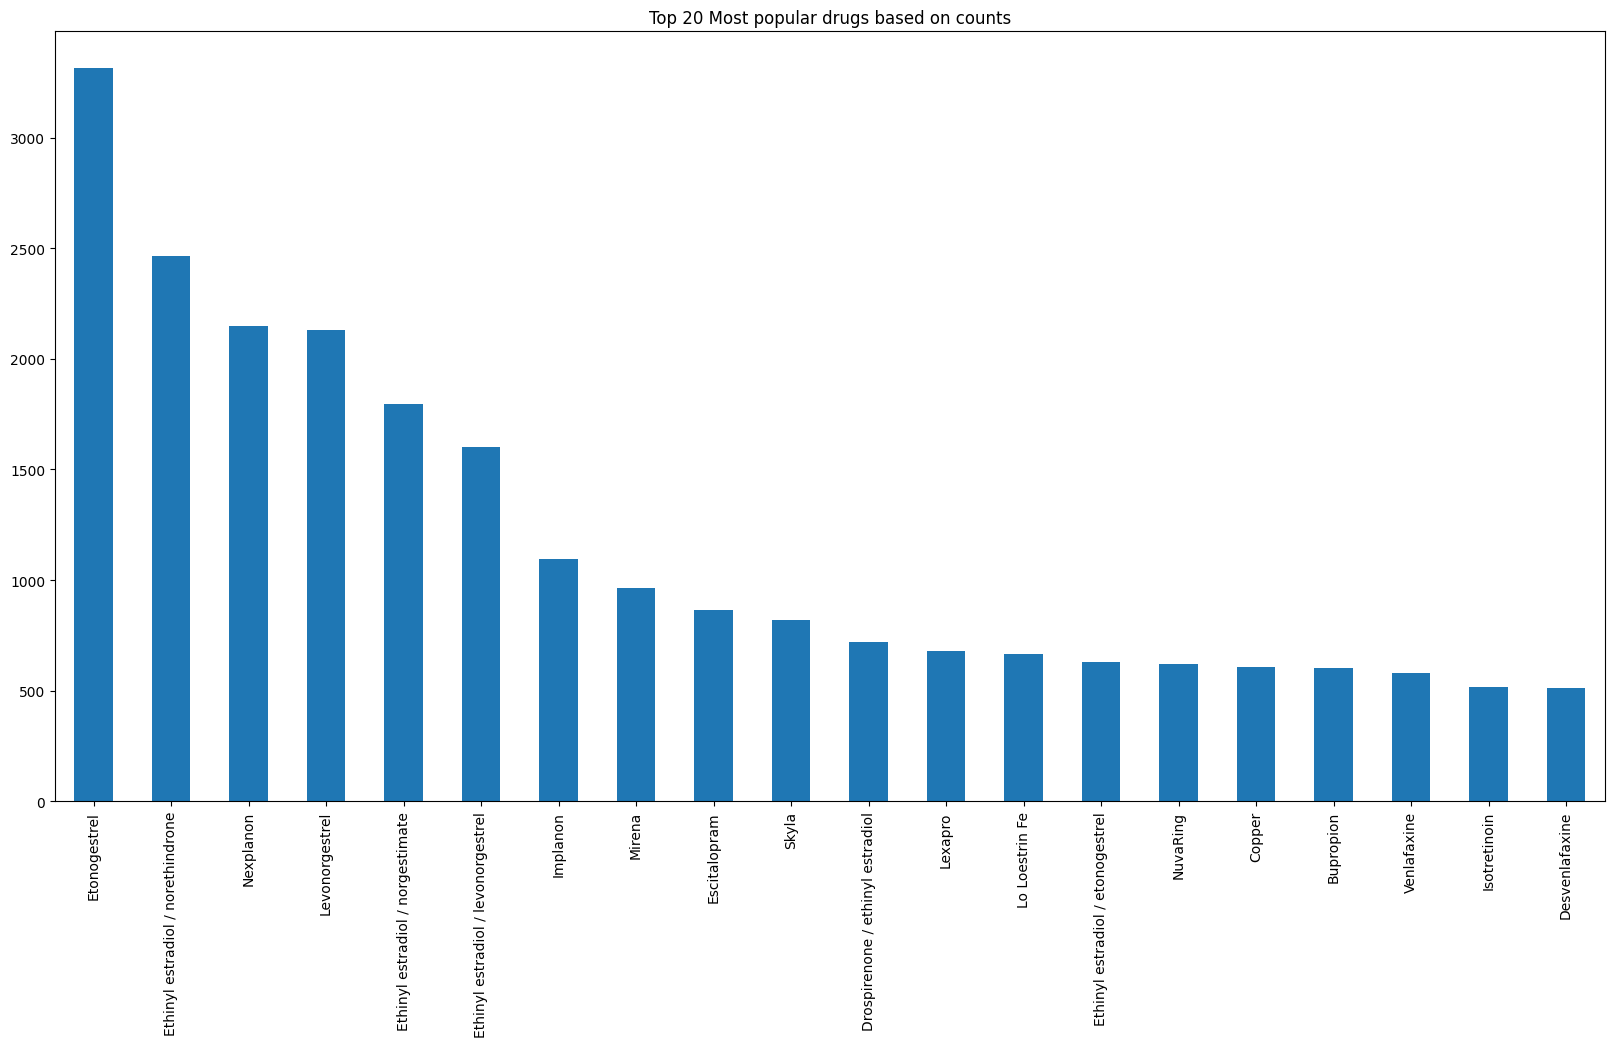

In [20]:
# Top 20 Drugs(MOst Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 Most popular drugs based on counts')
plt.show()

<Figure size 1500x1000 with 0 Axes>

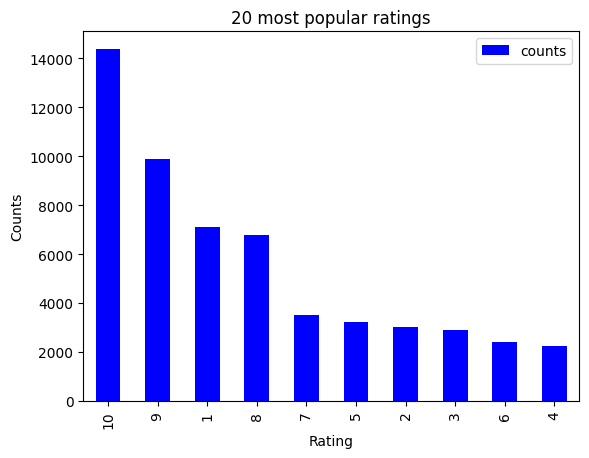

In [21]:
# Grouping the data by rating and count the frequency of each rating
rating_counts = df.groupby('rating').size().reset_index(name='counts')

# Sort the data by the frequency of each rating
rating_counts = rating_counts.sort_values(by='counts',ascending=False)

# Plot a bar chart of the 20 most popular ratings
plt.figure(figsize=(15,10))
rating_counts[:20].plot.bar(x='rating',y='counts',color='blue')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('20 most popular ratings')
plt.show()

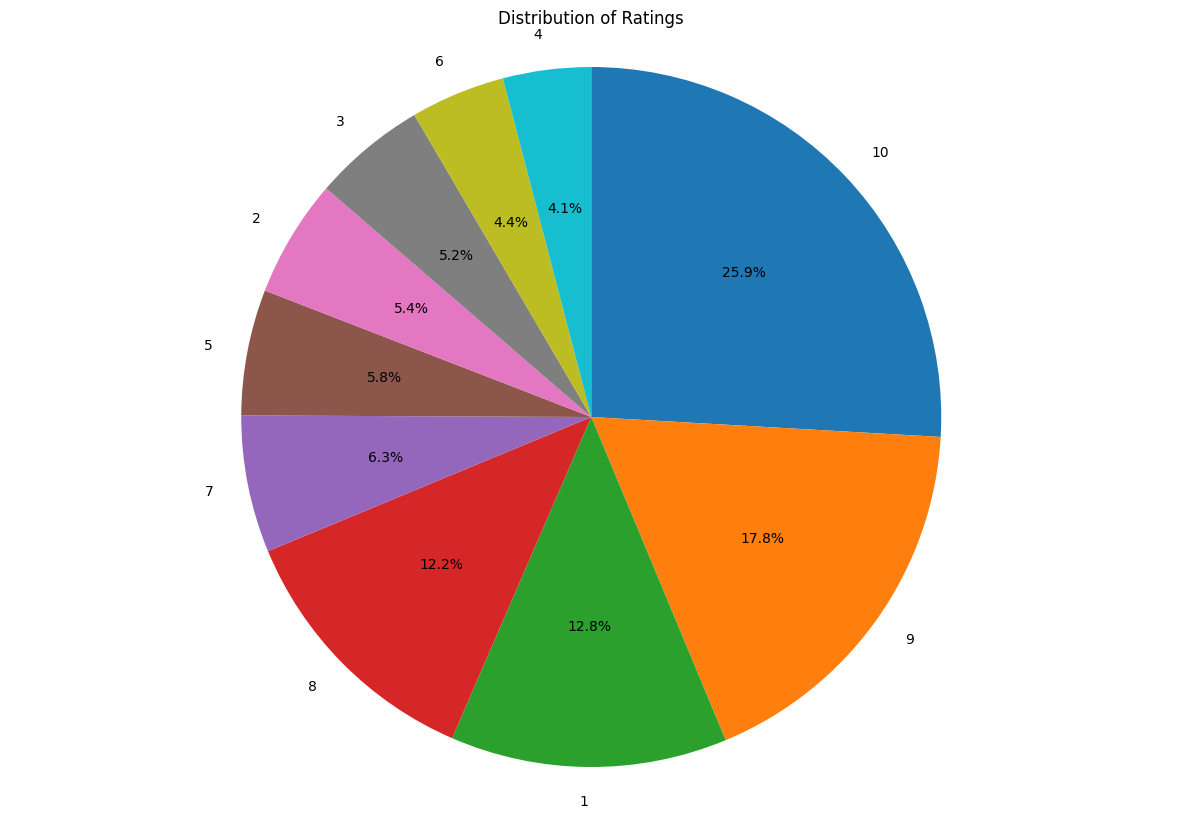

In [22]:
# Plot a pie chart of the distribution of ratings
plt.figure(figsize=(15,10))
plt.pie(rating_counts['counts'], labels=rating_counts['rating'], startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

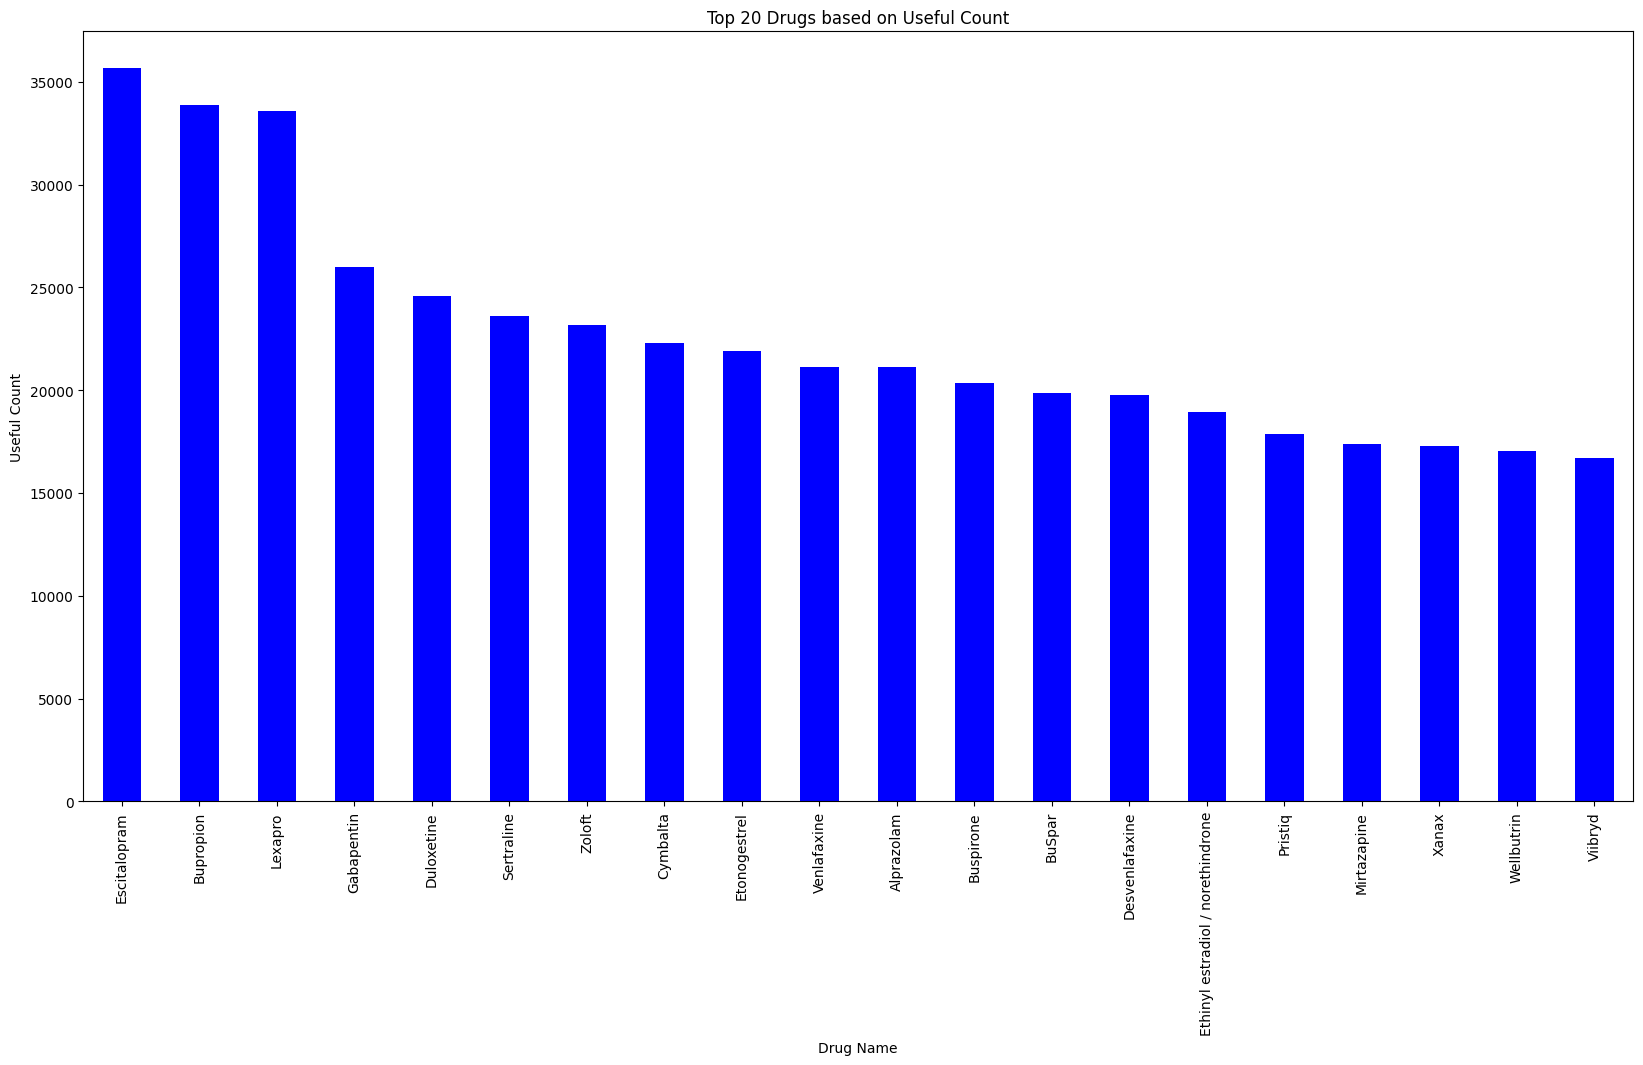

In [23]:
# Get the 20 most popular drugs based on usefulCount
plt.figure(figsize=(20,10))
top_20_drugs = df.groupby('drugName')['usefulCount'].sum().sort_values(ascending=False).head(20)

# Plot the bar plot
top_20_drugs.plot(kind='bar', color='blue')
plt.xlabel('Drug Name')
plt.ylabel('Useful Count')
plt.title('Top 20 Drugs based on Useful Count')
plt.xticks(rotation=90)
plt.show()

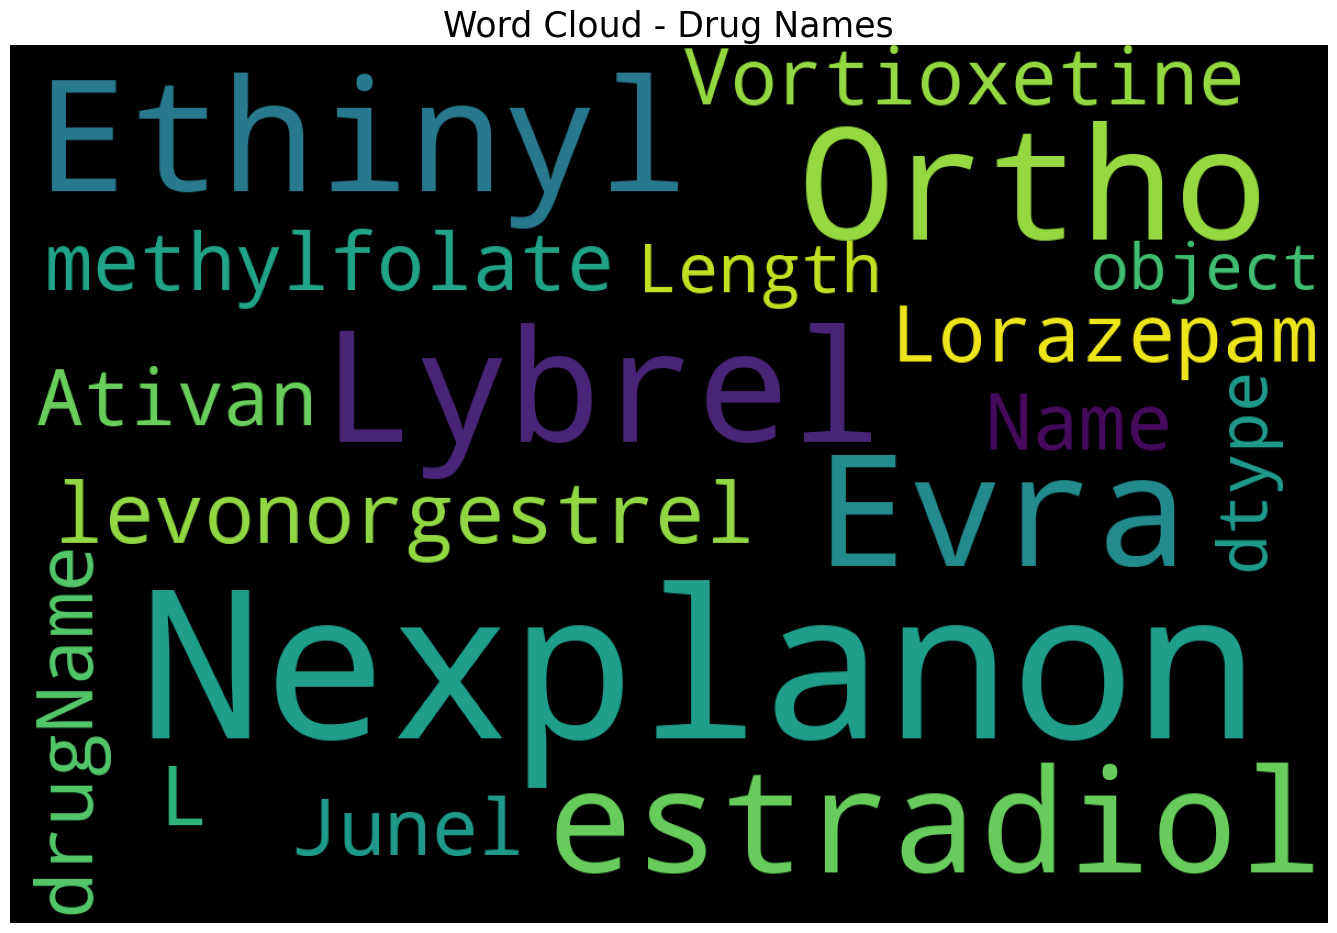

In [24]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(df['drugName']))

plt.rcParams['figure.figsize'] = (17, 17)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

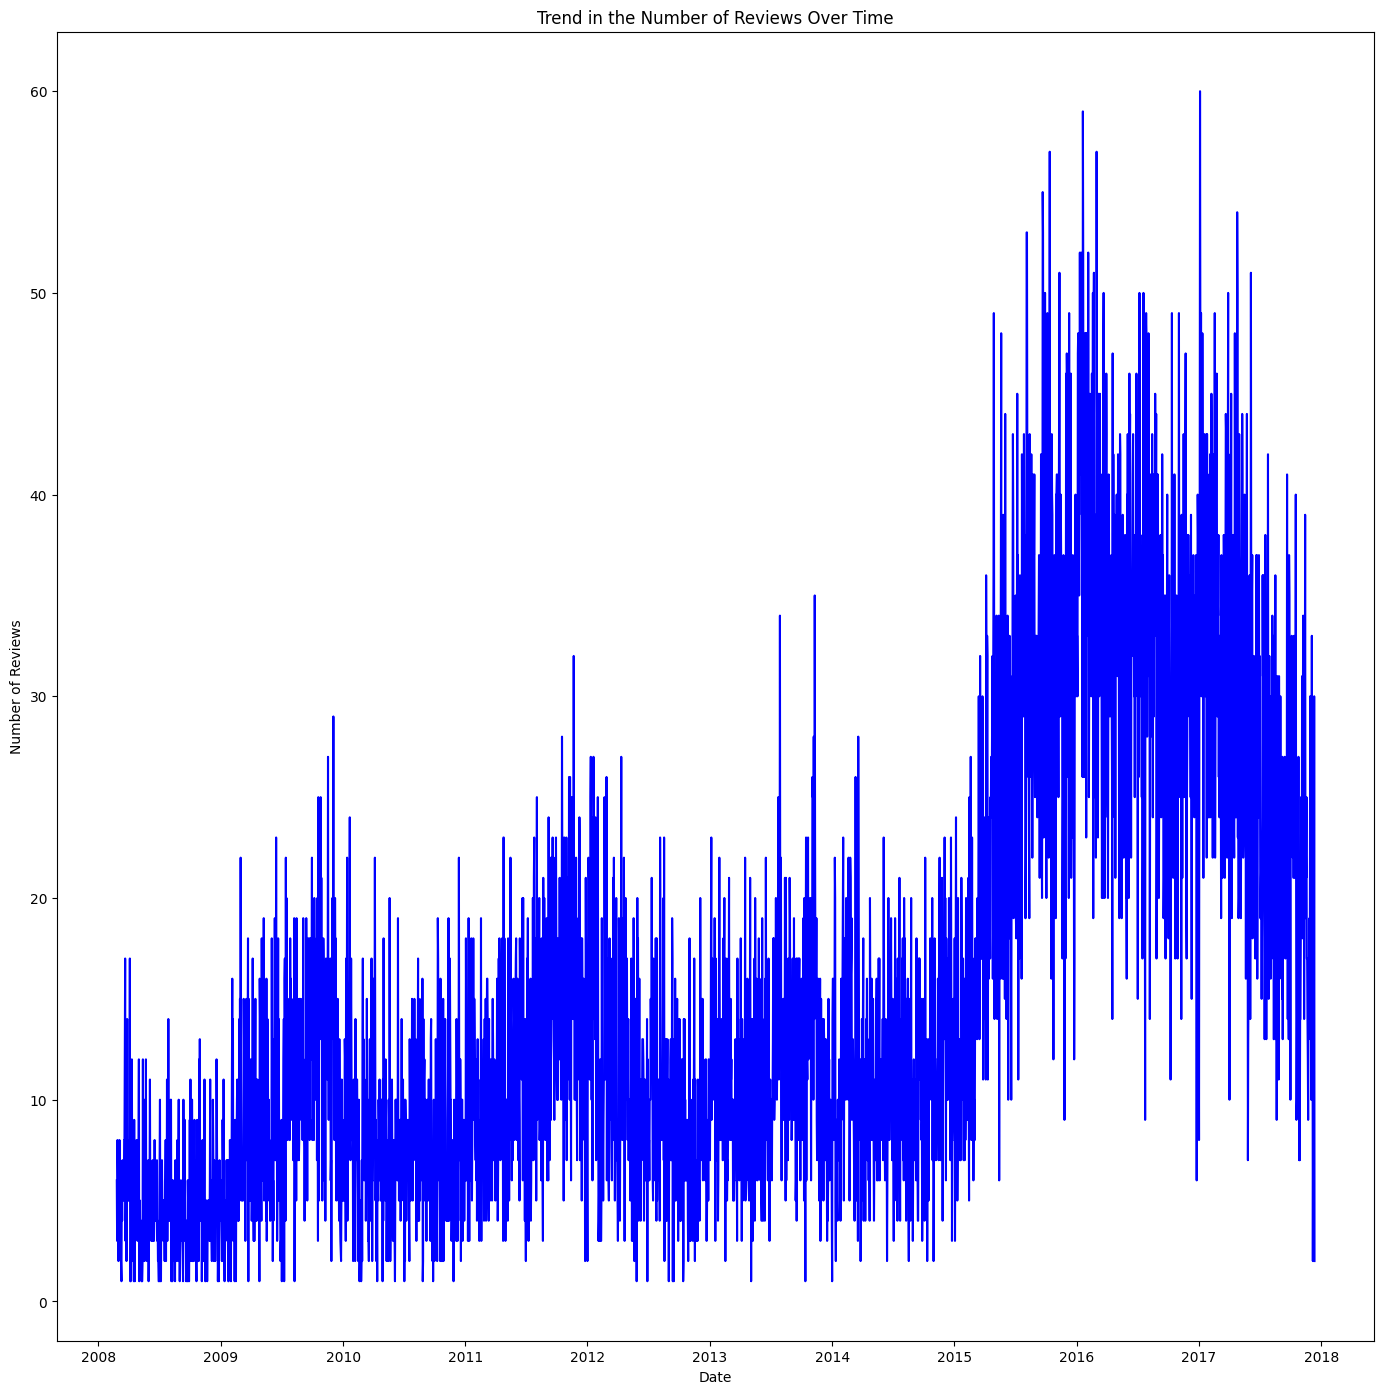

In [25]:
# Convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by date and count the number of reviews for each date
reviews_per_date = df.groupby(df['date'].dt.date).size().reset_index(name='counts')

# Plot a line chart of the trend in the number of reviews over time
plt.plot(reviews_per_date['date'], reviews_per_date['counts'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Trend in the Number of Reviews Over Time')
plt.show()

## Interpretation:
1-Improved Accessibility: There might have been improvements in the accessibility of the drug, either through increased availability or decreased cost, which led to an increase in the number of patients using the drug and writing reviews.

2-Increased Use of Online Platforms: The increase in the use of online platforms for reviewing drugs and conditions might have contributed to the increase in the number of reviews from 2015 onwards.

3-Changes in Marketing Strategies: The drug manufacturer or the healthcare industry might have changed their marketing strategies to increase the visibility of the drug, which led to an increase in the number of patients using the drug and writing reviews.

# Data clean

In [26]:
def clean_review(review):
    # Convert to lowercase
    review = review.lower()

    # Remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the review
    tokens = nltk.word_tokenize(review)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Join the cleaned tokens back together
    cleaned_review = ' '.join(tokens)

    return cleaned_review

In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [28]:
df['review'] = df['review'].apply(lambda x: clean_review(x))

In [29]:
df.drop(['date'],axis=1,inplace=True)

The importance of the date feature depends on the business problem and the type of model being used. In some cases, the date feature may be important in identifying patterns and trends over time. For example, if you are building a time-series model, the date feature would be an important input for the model. However, in other cases, the date feature may not be as relevant. For instance, if you are building a model to predict the rating based on the review, the date feature may not have a significant impact on the model's predictions.

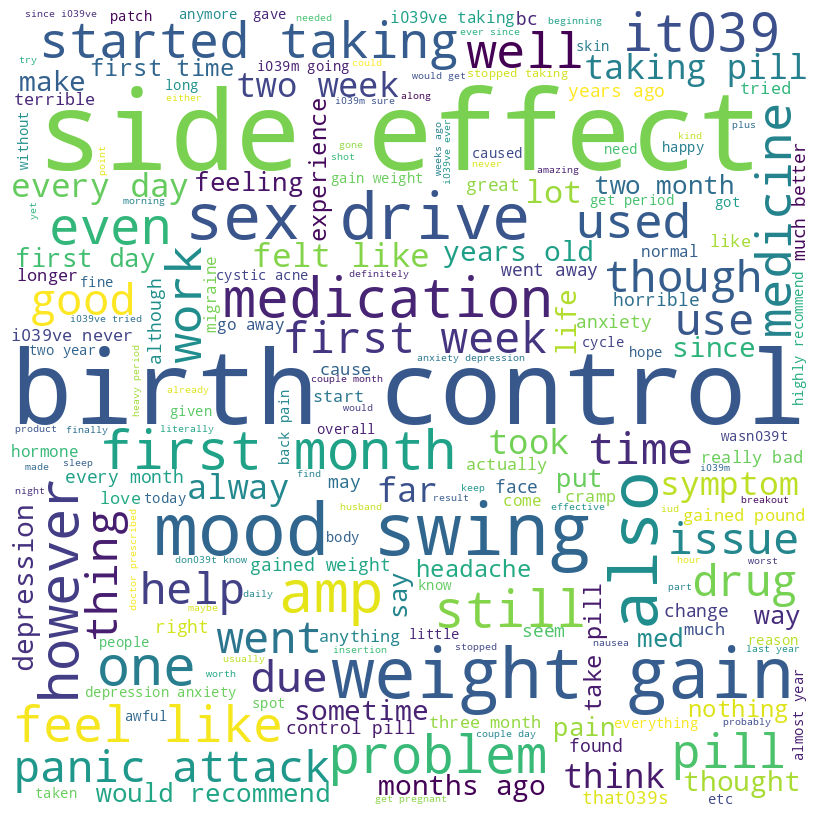

In [30]:
# Get the stopwords as a list
stopwords = list(stopwords.words('english'))

# Join all the reviews into a single string
reviews_text = " ".join(review for review in df.review)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(reviews_text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [32]:
df.head(10)

,drugName,condition,review,rating,usefulCount
2,Lybrel,Birth Control,used take another oral contraceptive 21 pill c...,5,17
3,Ortho Evra,Birth Control,first time using form birth control i039m glad...,8,10
9,Ethinyl estradiol / levonorgestrel,Birth Control,pill many years doctor changed rx chateal effe...,8,1
11,L-methylfolate,Depression,taken antidepressants years improvement mostly...,10,54
14,Nexplanon,Birth Control,started nexplanon 2 months ago minimal amount ...,3,10
22,Etonogestrel,Birth Control,nexplanon job worry free sex thing periods som...,9,11
31,Sertraline,Depression,1 week zoloft anxiety mood swings take 50mg mo...,8,3
32,Toradol,Pain,30 years old multiple composite spinal injurie...,10,16
37,Morphine,Pain,morphine least 7 yearsit medicine seems manage...,8,19
44,Venlafaxine,Depression,gp started venlafaxine yesterday help depressi...,4,3


# model building

In [33]:
df["rating"] = df["rating"].astype(int)

In [34]:
# Create the feature matrix
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
reviews = vectorizer.fit_transform(df["review"])

In [35]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(reviews, df["condition"], test_size=0.25, random_state=42)

## Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# Train the model
model = LogisticRegression(multi_class="ovr")
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [39]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

         Acne       0.96      0.86      0.90      1354
      Anxiety       0.86      0.74      0.80      1456
Birth Control       0.96      0.99      0.97      7152
   Depression       0.84      0.89      0.87      2338
         Pain       0.94      0.94      0.94      1574

     accuracy                           0.93     13874
    macro avg       0.91      0.88      0.90     13874
 weighted avg       0.93      0.93      0.93     13874



In [40]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


## random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

         Acne       0.99      0.90      0.94      1354
      Anxiety       0.91      0.78      0.84      1456
Birth Control       0.96      0.99      0.98      7152
   Depression       0.87      0.90      0.89      2338
         Pain       0.94      0.96      0.95      1574

     accuracy                           0.94     13874
    macro avg       0.94      0.91      0.92     13874
 weighted avg       0.94      0.94      0.94     13874



In [44]:
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model2.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Pain


## SVM

In [45]:
from sklearn.svm import SVC

In [46]:
# Train the model
model3 = SVC()
model3.fit(X_train, y_train)

SVC()

In [47]:
# Evaluate the model
y_pred = model3.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

         Acne       0.98      0.90      0.94      1354
      Anxiety       0.90      0.82      0.86      1456
Birth Control       0.98      0.99      0.99      7152
   Depression       0.87      0.94      0.91      2338
         Pain       0.96      0.95      0.96      1574

     accuracy                           0.95     13874
    macro avg       0.94      0.92      0.93     13874
 weighted avg       0.95      0.95      0.95     13874



In [48]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model3.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Anxiety


## gradient boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
# Train the model
model4 = GradientBoostingClassifier()
model4.fit(X_train, y_train)

GradientBoostingClassifier()

In [51]:
# Evaluate the model
y_pred = model4.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

         Acne       0.90      0.85      0.87      1354
      Anxiety       0.83      0.70      0.76      1456
Birth Control       0.92      0.97      0.94      7152
   Depression       0.81      0.82      0.81      2338
         Pain       0.93      0.86      0.89      1574

     accuracy                           0.89     13874
    macro avg       0.88      0.84      0.86     13874
 weighted avg       0.89      0.89      0.89     13874



In [52]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model4.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Depression


## decision tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
# Train the model
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
# Evaluate the model
y_pred = model5.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

         Acne       0.91      0.87      0.89      1354
      Anxiety       0.79      0.78      0.79      1456
Birth Control       0.95      0.96      0.96      7152
   Depression       0.83      0.83      0.83      2338
         Pain       0.92      0.91      0.92      1574

     accuracy                           0.91     13874
    macro avg       0.88      0.87      0.88     13874
 weighted avg       0.91      0.91      0.91     13874



In [56]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model5.predict(new_review)[0]
print("Predicted Condition:", new_condition)

Predicted Condition: Birth Control


##Drug recommnedation based on rating

In [57]:
drug_ratings = df[df["condition"] == new_condition].groupby("drugName")["rating"].mean()
recommended_drugs = drug_ratings.nlargest(5).index.tolist()
print("Recommended Drugs based on ratings only:")
for i, drug in enumerate(recommended_drugs):
    print(i+1, drug)

Recommended Drugs based on ratings only:
1 Elinest
2 Plan B
3 Provera
4 Heather
5 Ortho-Novum 7 / 7 / 7
